# Importation des modules

In [2]:
# Pour créer des dataframes et manipuler des données
import pandas as pd

# Pour visualiser facilement les valeurs manquantes dans un jeu de données
import missingno as msno

# Pour tracer des graphiques
import matplotlib.pyplot as plt

# Nettoyage des données 

On commence par créer un dataframe avec pandas pour afficher et lire les données de notre dataset.

In [3]:
dataset = pd.read_csv("dataset.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Notre dataset contient 7 colonnes de 1338 lignes.

## 1. Valeurs nulles

On vérifie ensuite si notre jeu de données comporte des valeurs nulles.

In [4]:
# La méthode "isnull" renvoie un masque booléen indiquant pour chaque valeur dans le DataFrame si elle est nulle ou non, puis on additionne les valeurs du masque booléen pour chaque colonne 
result = dataset.isnull().sum()

# affichage
result

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(1.06, 0.5, 'Nombre de lignes')

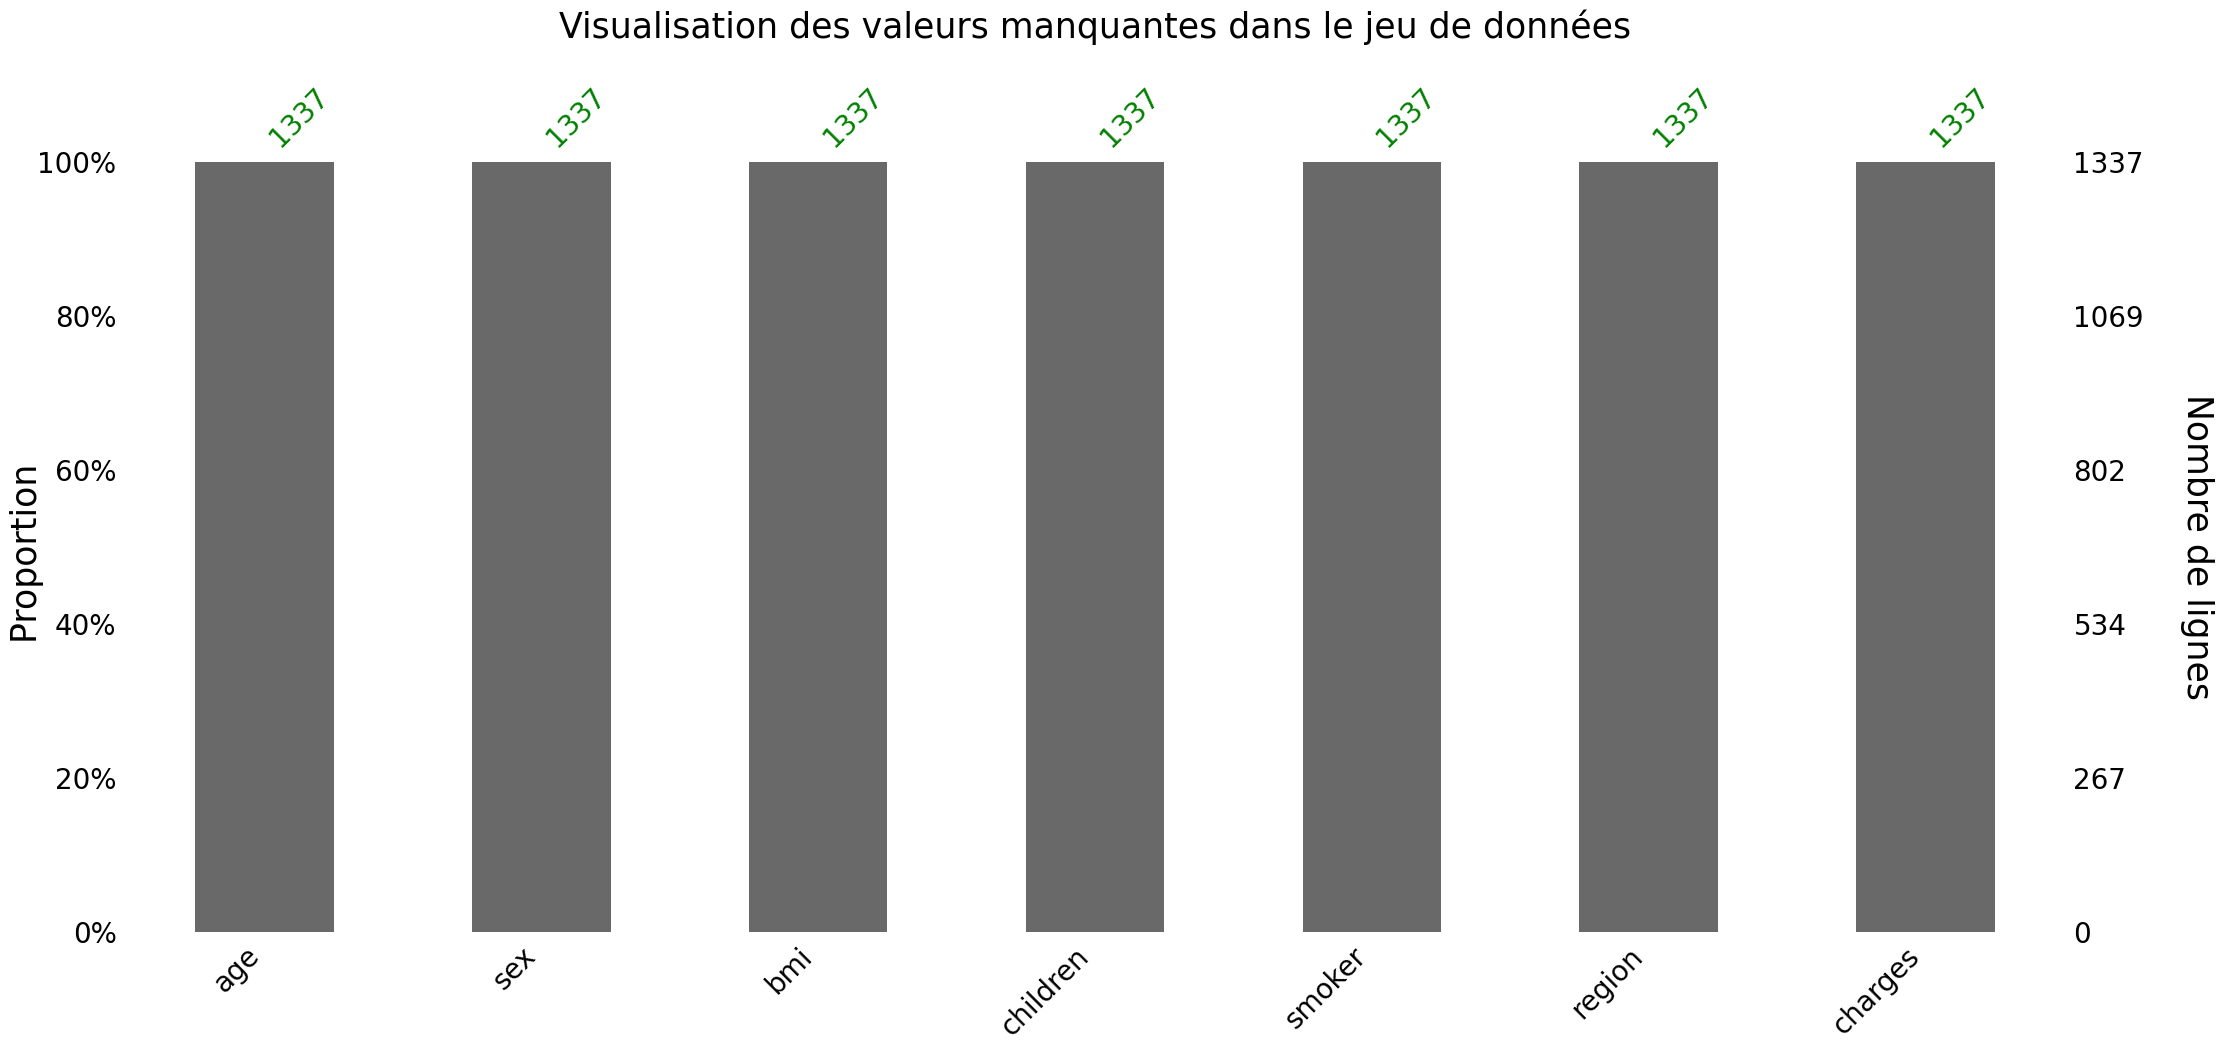

In [17]:
# Visualisation des valeurs manquantes avec "msno.bar"
msno.bar(dataset, fontsize=20)

# Ajout d'un titre
plt.title('Visualisation des valeurs manquantes dans le jeu de données', fontsize=25, y=1.15)

# Personnalisation
plt.xticks(color="green", fontsize=20)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

# Ajout de labels aux axes de la représentation
plt.text(-0.06, 0.5, 'Proportion ', fontsize=25, verticalalignment='center', rotation='vertical', transform=plt.gca().transAxes)
plt.text(1.06, 0.5, 'Nombre de lignes', fontsize=25, verticalalignment='center', rotation=270, transform=plt.gca().transAxes)


Conclusion : notre dataset ne comporte aucune valeur nulle car on peut voir dans notre représentation que toutes les colonnes ont des barres "pleines", ce qui signifie que la proportion de valeurs non nulles est égale à 1.0.

## 2. Doublons

On vérifie maintenant si notre jeu de données contient des doublons.

In [6]:
# La méthode "duplicated" renvoie un masque booléen indiquant pour ligne si elle est un doublon d'une ligne précédente, puis on additionne les valeurs du masque booléen pour chaque colonne 
x = dataset.duplicated().sum()

print(f"Le dataset contient {x} doublon(s).")

Le dataset contient 1 doublon(s).


In [7]:
# On sélectionne tous les doublons d'une même ligne
duplicates = dataset[dataset.duplicated(keep=False)]
duplicates

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


On remarque ici que les deux lignes sont identiques et que les valeurs de "charges" sont égales à la 4e décimale près.<br>
Ainsi, on peut considérer que le doublon correspondant à la même personne que la première ligne, et donc la retirer de notre dataset.<br>
De plus, la suppression d'une seule ligne, compte tenu de la taille de notre jeu de données (1338 lignes) n'aura aucun impact sur nos analyses, et on sera sûr d'utiliser un dataset sans doublons.

In [8]:
# Suppression du doublon 
dataset = dataset.drop_duplicates()

# Affichage
dataset


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3. Type de données par colonne

On regarde quels sont le type de données de la plupart des valeurs pour chaque colonne :

In [9]:
for col in list(dataset.columns):
    print(f"{col} : {dataset[col].dtype}")

age : int64
sex : object
bmi : float64
children : int64
smoker : object
region : object
charges : float64


Puis on vérifie que les valeurs d'une même colonne sont toutes de même types :

In [10]:
for col in list(dataset.columns):
    print(f"{col} : {dataset[col].unique().dtype}")

age : int64
sex : object
bmi : float64
children : int64
smoker : object
region : object
charges : float64


### Conclusion : notre dataset est propre, on va pouvoir l'analyser et l'utiliser dans nos modèles.